# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [1]:
# can comment out after executing
!unzip processed-celeba-small.zip

Archive:  processed-celeba-small.zip
   creating: processed_celeba_small/
  inflating: processed_celeba_small/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/processed_celeba_small/
  inflating: __MACOSX/processed_celeba_small/._.DS_Store  
   creating: processed_celeba_small/celeba/
  inflating: processed_celeba_small/celeba/.DS_Store  
   creating: __MACOSX/processed_celeba_small/celeba/
  inflating: __MACOSX/processed_celeba_small/celeba/._.DS_Store  
  inflating: processed_celeba_small/celeba/161979.jpg  
  inflating: processed_celeba_small/celeba/161980.jpg  
  inflating: processed_celeba_small/celeba/161981.jpg  
  inflating: processed_celeba_small/celeba/161982.jpg  
  inflating: processed_celeba_small/celeba/161983.jpg  
  inflating: processed_celeba_small/celeba/161984.jpg  
  inflating: processed_celeba_small/celeba/161985.jpg  
  inflating: processed_celeba_small/celeba/161986.jpg  
  inflating: processed_celeba_small/celeba/161987.jpg  
  inflating: processed_celeb

  inflating: processed_celeba_small/celeba/162874.jpg  
  inflating: processed_celeba_small/celeba/162875.jpg  
  inflating: processed_celeba_small/celeba/162876.jpg  
  inflating: processed_celeba_small/celeba/162877.jpg  
  inflating: processed_celeba_small/celeba/162878.jpg  
  inflating: processed_celeba_small/celeba/162879.jpg  
  inflating: processed_celeba_small/celeba/162880.jpg  
  inflating: processed_celeba_small/celeba/162881.jpg  
  inflating: processed_celeba_small/celeba/162882.jpg  
  inflating: processed_celeba_small/celeba/162883.jpg  
  inflating: processed_celeba_small/celeba/162884.jpg  
  inflating: processed_celeba_small/celeba/162885.jpg  
  inflating: processed_celeba_small/celeba/162886.jpg  
  inflating: processed_celeba_small/celeba/162887.jpg  
  inflating: processed_celeba_small/celeba/162888.jpg  
  inflating: processed_celeba_small/celeba/162889.jpg  
  inflating: processed_celeba_small/celeba/162890.jpg  
  inflating: processed_celeba_small/celeba/16289

  inflating: processed_celeba_small/celeba/163946.jpg  
  inflating: processed_celeba_small/celeba/163947.jpg  
  inflating: processed_celeba_small/celeba/163948.jpg  
  inflating: processed_celeba_small/celeba/163949.jpg  
  inflating: processed_celeba_small/celeba/163950.jpg  
  inflating: processed_celeba_small/celeba/163951.jpg  
  inflating: processed_celeba_small/celeba/163952.jpg  
  inflating: processed_celeba_small/celeba/163953.jpg  
  inflating: processed_celeba_small/celeba/163954.jpg  
  inflating: processed_celeba_small/celeba/163955.jpg  
  inflating: processed_celeba_small/celeba/163956.jpg  
  inflating: processed_celeba_small/celeba/163957.jpg  
  inflating: processed_celeba_small/celeba/163958.jpg  
  inflating: processed_celeba_small/celeba/163959.jpg  
  inflating: processed_celeba_small/celeba/163960.jpg  
  inflating: processed_celeba_small/celeba/163961.jpg  
  inflating: processed_celeba_small/celeba/163962.jpg  
  inflating: processed_celeba_small/celeba/16396

  inflating: processed_celeba_small/celeba/165005.jpg  
  inflating: processed_celeba_small/celeba/165006.jpg  
  inflating: processed_celeba_small/celeba/165007.jpg  
  inflating: processed_celeba_small/celeba/165008.jpg  
  inflating: processed_celeba_small/celeba/165009.jpg  
  inflating: processed_celeba_small/celeba/165010.jpg  
  inflating: processed_celeba_small/celeba/165011.jpg  
  inflating: processed_celeba_small/celeba/165012.jpg  
  inflating: processed_celeba_small/celeba/165013.jpg  
  inflating: processed_celeba_small/celeba/165014.jpg  
  inflating: processed_celeba_small/celeba/165015.jpg  
  inflating: processed_celeba_small/celeba/165016.jpg  
  inflating: processed_celeba_small/celeba/165017.jpg  
  inflating: processed_celeba_small/celeba/165018.jpg  
  inflating: processed_celeba_small/celeba/165019.jpg  
  inflating: processed_celeba_small/celeba/165020.jpg  
  inflating: processed_celeba_small/celeba/165021.jpg  
  inflating: processed_celeba_small/celeba/16502

  inflating: processed_celeba_small/celeba/166055.jpg  
  inflating: processed_celeba_small/celeba/166056.jpg  
  inflating: processed_celeba_small/celeba/166057.jpg  
  inflating: processed_celeba_small/celeba/166058.jpg  
  inflating: processed_celeba_small/celeba/166059.jpg  
  inflating: processed_celeba_small/celeba/166060.jpg  
  inflating: processed_celeba_small/celeba/166061.jpg  
  inflating: processed_celeba_small/celeba/166062.jpg  
  inflating: processed_celeba_small/celeba/166063.jpg  
  inflating: processed_celeba_small/celeba/166064.jpg  
  inflating: processed_celeba_small/celeba/166065.jpg  
  inflating: processed_celeba_small/celeba/166066.jpg  
  inflating: processed_celeba_small/celeba/166067.jpg  
  inflating: processed_celeba_small/celeba/166068.jpg  
  inflating: processed_celeba_small/celeba/166069.jpg  
  inflating: processed_celeba_small/celeba/166070.jpg  
  inflating: processed_celeba_small/celeba/166071.jpg  
  inflating: processed_celeba_small/celeba/16607

  inflating: processed_celeba_small/celeba/167114.jpg  
  inflating: processed_celeba_small/celeba/167115.jpg  
  inflating: processed_celeba_small/celeba/167116.jpg  
  inflating: processed_celeba_small/celeba/167117.jpg  
  inflating: processed_celeba_small/celeba/167118.jpg  
  inflating: processed_celeba_small/celeba/167119.jpg  
  inflating: processed_celeba_small/celeba/167120.jpg  
  inflating: processed_celeba_small/celeba/167121.jpg  
  inflating: processed_celeba_small/celeba/167122.jpg  
  inflating: processed_celeba_small/celeba/167123.jpg  
  inflating: processed_celeba_small/celeba/167124.jpg  
  inflating: processed_celeba_small/celeba/167125.jpg  
  inflating: processed_celeba_small/celeba/167126.jpg  
  inflating: processed_celeba_small/celeba/167127.jpg  
  inflating: processed_celeba_small/celeba/167128.jpg  
  inflating: processed_celeba_small/celeba/167129.jpg  
  inflating: processed_celeba_small/celeba/167130.jpg  
  inflating: processed_celeba_small/celeba/16713

  inflating: processed_celeba_small/celeba/168174.jpg  
  inflating: processed_celeba_small/celeba/168175.jpg  
  inflating: processed_celeba_small/celeba/168176.jpg  
  inflating: processed_celeba_small/celeba/168177.jpg  
  inflating: processed_celeba_small/celeba/168178.jpg  
  inflating: processed_celeba_small/celeba/168179.jpg  
  inflating: processed_celeba_small/celeba/168180.jpg  
  inflating: processed_celeba_small/celeba/168181.jpg  
  inflating: processed_celeba_small/celeba/168182.jpg  
  inflating: processed_celeba_small/celeba/168183.jpg  
  inflating: processed_celeba_small/celeba/168184.jpg  
  inflating: processed_celeba_small/celeba/168185.jpg  
  inflating: processed_celeba_small/celeba/168186.jpg  
  inflating: processed_celeba_small/celeba/168187.jpg  
  inflating: processed_celeba_small/celeba/168188.jpg  
  inflating: processed_celeba_small/celeba/168189.jpg  
  inflating: processed_celeba_small/celeba/168190.jpg  
  inflating: processed_celeba_small/celeba/16819

  inflating: processed_celeba_small/celeba/169192.jpg  
  inflating: processed_celeba_small/celeba/169193.jpg  
  inflating: processed_celeba_small/celeba/169194.jpg  
  inflating: processed_celeba_small/celeba/169195.jpg  
  inflating: processed_celeba_small/celeba/169196.jpg  
  inflating: processed_celeba_small/celeba/169197.jpg  
  inflating: processed_celeba_small/celeba/169198.jpg  
  inflating: processed_celeba_small/celeba/169199.jpg  
  inflating: processed_celeba_small/celeba/169200.jpg  
  inflating: processed_celeba_small/celeba/169201.jpg  
  inflating: processed_celeba_small/celeba/169202.jpg  
  inflating: processed_celeba_small/celeba/169203.jpg  
  inflating: processed_celeba_small/celeba/169204.jpg  
  inflating: processed_celeba_small/celeba/169205.jpg  
  inflating: processed_celeba_small/celeba/169206.jpg  
  inflating: processed_celeba_small/celeba/169207.jpg  
  inflating: processed_celeba_small/celeba/169208.jpg  
  inflating: processed_celeba_small/celeba/16920

  inflating: processed_celeba_small/celeba/170250.jpg  
  inflating: processed_celeba_small/celeba/170251.jpg  
  inflating: processed_celeba_small/celeba/170252.jpg  
  inflating: processed_celeba_small/celeba/170253.jpg  
  inflating: processed_celeba_small/celeba/170254.jpg  
  inflating: processed_celeba_small/celeba/170255.jpg  
  inflating: processed_celeba_small/celeba/170256.jpg  
  inflating: processed_celeba_small/celeba/170257.jpg  
  inflating: processed_celeba_small/celeba/170258.jpg  
  inflating: processed_celeba_small/celeba/170259.jpg  
  inflating: processed_celeba_small/celeba/170260.jpg  
  inflating: processed_celeba_small/celeba/170261.jpg  
  inflating: processed_celeba_small/celeba/170262.jpg  
  inflating: processed_celeba_small/celeba/170263.jpg  
  inflating: processed_celeba_small/celeba/170264.jpg  
  inflating: processed_celeba_small/celeba/170265.jpg  
  inflating: processed_celeba_small/celeba/170266.jpg  
  inflating: processed_celeba_small/celeba/17026

  inflating: processed_celeba_small/celeba/171293.jpg  
  inflating: processed_celeba_small/celeba/171294.jpg  
  inflating: processed_celeba_small/celeba/171295.jpg  
  inflating: processed_celeba_small/celeba/171296.jpg  
  inflating: processed_celeba_small/celeba/171297.jpg  
  inflating: processed_celeba_small/celeba/171298.jpg  
  inflating: processed_celeba_small/celeba/171299.jpg  
  inflating: processed_celeba_small/celeba/171300.jpg  
  inflating: processed_celeba_small/celeba/171301.jpg  
  inflating: processed_celeba_small/celeba/171302.jpg  
  inflating: processed_celeba_small/celeba/171303.jpg  
  inflating: processed_celeba_small/celeba/171304.jpg  
  inflating: processed_celeba_small/celeba/171305.jpg  
  inflating: processed_celeba_small/celeba/171306.jpg  
  inflating: processed_celeba_small/celeba/171307.jpg  
  inflating: processed_celeba_small/celeba/171308.jpg  
  inflating: processed_celeba_small/celeba/171309.jpg  
  inflating: processed_celeba_small/celeba/17131

  inflating: processed_celeba_small/celeba/172355.jpg  
  inflating: processed_celeba_small/celeba/172356.jpg  
  inflating: processed_celeba_small/celeba/172357.jpg  
  inflating: processed_celeba_small/celeba/172358.jpg  
  inflating: processed_celeba_small/celeba/172359.jpg  
  inflating: processed_celeba_small/celeba/172360.jpg  
  inflating: processed_celeba_small/celeba/172361.jpg  
  inflating: processed_celeba_small/celeba/172362.jpg  
  inflating: processed_celeba_small/celeba/172363.jpg  
  inflating: processed_celeba_small/celeba/172364.jpg  
  inflating: processed_celeba_small/celeba/172365.jpg  
  inflating: processed_celeba_small/celeba/172366.jpg  
  inflating: processed_celeba_small/celeba/172367.jpg  
  inflating: processed_celeba_small/celeba/172368.jpg  
  inflating: processed_celeba_small/celeba/172369.jpg  
  inflating: processed_celeba_small/celeba/172370.jpg  
  inflating: processed_celeba_small/celeba/172371.jpg  
  inflating: processed_celeba_small/celeba/17237

  inflating: processed_celeba_small/celeba/173418.jpg  
  inflating: processed_celeba_small/celeba/173419.jpg  
  inflating: processed_celeba_small/celeba/173420.jpg  
  inflating: processed_celeba_small/celeba/173421.jpg  
  inflating: processed_celeba_small/celeba/173422.jpg  
  inflating: processed_celeba_small/celeba/173423.jpg  
  inflating: processed_celeba_small/celeba/173424.jpg  
  inflating: processed_celeba_small/celeba/173425.jpg  
  inflating: processed_celeba_small/celeba/173426.jpg  
  inflating: processed_celeba_small/celeba/173427.jpg  
  inflating: processed_celeba_small/celeba/173428.jpg  
  inflating: processed_celeba_small/celeba/173429.jpg  
  inflating: processed_celeba_small/celeba/173430.jpg  
  inflating: processed_celeba_small/celeba/173431.jpg  
  inflating: processed_celeba_small/celeba/173432.jpg  
  inflating: processed_celeba_small/celeba/173433.jpg  
  inflating: processed_celeba_small/celeba/173434.jpg  
  inflating: processed_celeba_small/celeba/17343

  inflating: processed_celeba_small/celeba/174460.jpg  
  inflating: processed_celeba_small/celeba/174461.jpg  
  inflating: processed_celeba_small/celeba/174462.jpg  
  inflating: processed_celeba_small/celeba/174463.jpg  
  inflating: processed_celeba_small/celeba/174464.jpg  
  inflating: processed_celeba_small/celeba/174465.jpg  
  inflating: processed_celeba_small/celeba/174466.jpg  
  inflating: processed_celeba_small/celeba/174467.jpg  
  inflating: processed_celeba_small/celeba/174468.jpg  
  inflating: processed_celeba_small/celeba/174469.jpg  
  inflating: processed_celeba_small/celeba/174470.jpg  
  inflating: processed_celeba_small/celeba/174471.jpg  
  inflating: processed_celeba_small/celeba/174472.jpg  
  inflating: processed_celeba_small/celeba/174473.jpg  
  inflating: processed_celeba_small/celeba/174474.jpg  
  inflating: processed_celeba_small/celeba/174475.jpg  
  inflating: processed_celeba_small/celeba/174476.jpg  
  inflating: processed_celeba_small/celeba/17447

  inflating: processed_celeba_small/celeba/175531.jpg  
  inflating: processed_celeba_small/celeba/175532.jpg  
  inflating: processed_celeba_small/celeba/175533.jpg  
  inflating: processed_celeba_small/celeba/175534.jpg  
  inflating: processed_celeba_small/celeba/175535.jpg  
  inflating: processed_celeba_small/celeba/175536.jpg  
  inflating: processed_celeba_small/celeba/175537.jpg  
  inflating: processed_celeba_small/celeba/175538.jpg  
  inflating: processed_celeba_small/celeba/175539.jpg  
  inflating: processed_celeba_small/celeba/175540.jpg  
  inflating: processed_celeba_small/celeba/175541.jpg  
  inflating: processed_celeba_small/celeba/175542.jpg  
  inflating: processed_celeba_small/celeba/175543.jpg  
  inflating: processed_celeba_small/celeba/175544.jpg  
  inflating: processed_celeba_small/celeba/175545.jpg  
  inflating: processed_celeba_small/celeba/175546.jpg  
  inflating: processed_celeba_small/celeba/175547.jpg  
  inflating: processed_celeba_small/celeba/17554

  inflating: processed_celeba_small/celeba/176573.jpg  
  inflating: processed_celeba_small/celeba/176574.jpg  
  inflating: processed_celeba_small/celeba/176575.jpg  
  inflating: processed_celeba_small/celeba/176576.jpg  
  inflating: processed_celeba_small/celeba/176577.jpg  
  inflating: processed_celeba_small/celeba/176578.jpg  
  inflating: processed_celeba_small/celeba/176579.jpg  
  inflating: processed_celeba_small/celeba/176580.jpg  
  inflating: processed_celeba_small/celeba/176581.jpg  
  inflating: processed_celeba_small/celeba/176582.jpg  
  inflating: processed_celeba_small/celeba/176583.jpg  
  inflating: processed_celeba_small/celeba/176584.jpg  
  inflating: processed_celeba_small/celeba/176585.jpg  
  inflating: processed_celeba_small/celeba/176586.jpg  
  inflating: processed_celeba_small/celeba/176587.jpg  
  inflating: processed_celeba_small/celeba/176588.jpg  
  inflating: processed_celeba_small/celeba/176589.jpg  
  inflating: processed_celeba_small/celeba/17659

  inflating: processed_celeba_small/celeba/177644.jpg  
  inflating: processed_celeba_small/celeba/177645.jpg  
  inflating: processed_celeba_small/celeba/177646.jpg  
  inflating: processed_celeba_small/celeba/177647.jpg  
  inflating: processed_celeba_small/celeba/177648.jpg  
  inflating: processed_celeba_small/celeba/177649.jpg  
  inflating: processed_celeba_small/celeba/177650.jpg  
  inflating: processed_celeba_small/celeba/177651.jpg  
  inflating: processed_celeba_small/celeba/177652.jpg  
  inflating: processed_celeba_small/celeba/177653.jpg  
  inflating: processed_celeba_small/celeba/177654.jpg  
  inflating: processed_celeba_small/celeba/177655.jpg  
  inflating: processed_celeba_small/celeba/177656.jpg  
  inflating: processed_celeba_small/celeba/177657.jpg  
  inflating: processed_celeba_small/celeba/177658.jpg  
  inflating: processed_celeba_small/celeba/177659.jpg  
  inflating: processed_celeba_small/celeba/177660.jpg  
  inflating: processed_celeba_small/celeba/17766

  inflating: processed_celeba_small/celeba/178389.jpg  
  inflating: processed_celeba_small/celeba/178390.jpg  
  inflating: processed_celeba_small/celeba/178391.jpg  
  inflating: processed_celeba_small/celeba/178392.jpg  
  inflating: processed_celeba_small/celeba/178393.jpg  
  inflating: processed_celeba_small/celeba/178394.jpg  
  inflating: processed_celeba_small/celeba/178395.jpg  
  inflating: processed_celeba_small/celeba/178396.jpg  
  inflating: processed_celeba_small/celeba/178397.jpg  
  inflating: processed_celeba_small/celeba/178398.jpg  
  inflating: processed_celeba_small/celeba/178399.jpg  
  inflating: processed_celeba_small/celeba/178400.jpg  
  inflating: processed_celeba_small/celeba/178401.jpg  
  inflating: processed_celeba_small/celeba/178402.jpg  
  inflating: processed_celeba_small/celeba/178403.jpg  
  inflating: processed_celeba_small/celeba/178404.jpg  
  inflating: processed_celeba_small/celeba/178405.jpg  
  inflating: processed_celeba_small/celeba/17840

  inflating: processed_celeba_small/celeba/179273.jpg  
  inflating: processed_celeba_small/celeba/179274.jpg  
  inflating: processed_celeba_small/celeba/179275.jpg  
  inflating: processed_celeba_small/celeba/179276.jpg  
  inflating: processed_celeba_small/celeba/179277.jpg  
  inflating: processed_celeba_small/celeba/179278.jpg  
  inflating: processed_celeba_small/celeba/179279.jpg  
  inflating: processed_celeba_small/celeba/179280.jpg  
  inflating: processed_celeba_small/celeba/179281.jpg  
  inflating: processed_celeba_small/celeba/179282.jpg  
  inflating: processed_celeba_small/celeba/179283.jpg  
  inflating: processed_celeba_small/celeba/179284.jpg  
  inflating: processed_celeba_small/celeba/179285.jpg  
  inflating: processed_celeba_small/celeba/179286.jpg  
  inflating: processed_celeba_small/celeba/179287.jpg  
  inflating: processed_celeba_small/celeba/179288.jpg  
  inflating: processed_celeba_small/celeba/179289.jpg  
  inflating: processed_celeba_small/celeba/17929

  inflating: processed_celeba_small/celeba/180326.jpg  
  inflating: processed_celeba_small/celeba/180327.jpg  
  inflating: processed_celeba_small/celeba/180328.jpg  
  inflating: processed_celeba_small/celeba/180329.jpg  
  inflating: processed_celeba_small/celeba/180330.jpg  
  inflating: processed_celeba_small/celeba/180331.jpg  
  inflating: processed_celeba_small/celeba/180332.jpg  
  inflating: processed_celeba_small/celeba/180333.jpg  
  inflating: processed_celeba_small/celeba/180334.jpg  
  inflating: processed_celeba_small/celeba/180335.jpg  
  inflating: processed_celeba_small/celeba/180336.jpg  
  inflating: processed_celeba_small/celeba/180337.jpg  
  inflating: processed_celeba_small/celeba/180338.jpg  
  inflating: processed_celeba_small/celeba/180339.jpg  
  inflating: processed_celeba_small/celeba/180340.jpg  
  inflating: processed_celeba_small/celeba/180341.jpg  
  inflating: processed_celeba_small/celeba/180342.jpg  
  inflating: processed_celeba_small/celeba/18034

  inflating: processed_celeba_small/celeba/181163.jpg  
  inflating: processed_celeba_small/celeba/181164.jpg  
  inflating: processed_celeba_small/celeba/181165.jpg  
  inflating: processed_celeba_small/celeba/181166.jpg  
  inflating: processed_celeba_small/celeba/181167.jpg  
  inflating: processed_celeba_small/celeba/181168.jpg  
  inflating: processed_celeba_small/celeba/181169.jpg  
  inflating: processed_celeba_small/celeba/181170.jpg  
  inflating: processed_celeba_small/celeba/181171.jpg  
  inflating: processed_celeba_small/celeba/181172.jpg  
  inflating: processed_celeba_small/celeba/181173.jpg  
  inflating: processed_celeba_small/celeba/181174.jpg  
  inflating: processed_celeba_small/celeba/181175.jpg  
  inflating: processed_celeba_small/celeba/181176.jpg  
  inflating: processed_celeba_small/celeba/181177.jpg  
  inflating: processed_celeba_small/celeba/181178.jpg  
  inflating: processed_celeba_small/celeba/181179.jpg  
  inflating: processed_celeba_small/celeba/18118

  inflating: processed_celeba_small/celeba/182226.jpg  
  inflating: processed_celeba_small/celeba/182227.jpg  
  inflating: processed_celeba_small/celeba/182228.jpg  
  inflating: processed_celeba_small/celeba/182229.jpg  
  inflating: processed_celeba_small/celeba/182230.jpg  
  inflating: processed_celeba_small/celeba/182231.jpg  
  inflating: processed_celeba_small/celeba/182232.jpg  
  inflating: processed_celeba_small/celeba/182233.jpg  
  inflating: processed_celeba_small/celeba/182234.jpg  
  inflating: processed_celeba_small/celeba/182235.jpg  
  inflating: processed_celeba_small/celeba/182236.jpg  
  inflating: processed_celeba_small/celeba/182237.jpg  
  inflating: processed_celeba_small/celeba/182238.jpg  
  inflating: processed_celeba_small/celeba/182239.jpg  
  inflating: processed_celeba_small/celeba/182240.jpg  
  inflating: processed_celeba_small/celeba/182241.jpg  
  inflating: processed_celeba_small/celeba/182242.jpg  
  inflating: processed_celeba_small/celeba/18224

  inflating: processed_celeba_small/celeba/183237.jpg  
  inflating: processed_celeba_small/celeba/183238.jpg  
  inflating: processed_celeba_small/celeba/183239.jpg  
  inflating: processed_celeba_small/celeba/183240.jpg  
  inflating: processed_celeba_small/celeba/183241.jpg  
  inflating: processed_celeba_small/celeba/183242.jpg  
  inflating: processed_celeba_small/celeba/183243.jpg  
  inflating: processed_celeba_small/celeba/183244.jpg  
  inflating: processed_celeba_small/celeba/183245.jpg  
  inflating: processed_celeba_small/celeba/183246.jpg  
  inflating: processed_celeba_small/celeba/183247.jpg  
  inflating: processed_celeba_small/celeba/183248.jpg  
  inflating: processed_celeba_small/celeba/183249.jpg  
  inflating: processed_celeba_small/celeba/183250.jpg  
  inflating: processed_celeba_small/celeba/183251.jpg  
  inflating: processed_celeba_small/celeba/183252.jpg  
  inflating: processed_celeba_small/celeba/183253.jpg  
  inflating: processed_celeba_small/celeba/18325

  inflating: processed_celeba_small/celeba/184232.jpg  
  inflating: processed_celeba_small/celeba/184233.jpg  
  inflating: processed_celeba_small/celeba/184234.jpg  
  inflating: processed_celeba_small/celeba/184235.jpg  
  inflating: processed_celeba_small/celeba/184236.jpg  
  inflating: processed_celeba_small/celeba/184237.jpg  
  inflating: processed_celeba_small/celeba/184238.jpg  
  inflating: processed_celeba_small/celeba/184239.jpg  
  inflating: processed_celeba_small/celeba/184240.jpg  
  inflating: processed_celeba_small/celeba/184241.jpg  
  inflating: processed_celeba_small/celeba/184242.jpg  
  inflating: processed_celeba_small/celeba/184243.jpg  
  inflating: processed_celeba_small/celeba/184244.jpg  
  inflating: processed_celeba_small/celeba/184245.jpg  
  inflating: processed_celeba_small/celeba/184246.jpg  
  inflating: processed_celeba_small/celeba/184247.jpg  
  inflating: processed_celeba_small/celeba/184248.jpg  
  inflating: processed_celeba_small/celeba/18424

  inflating: processed_celeba_small/celeba/185152.jpg  
  inflating: processed_celeba_small/celeba/185153.jpg  
  inflating: processed_celeba_small/celeba/185154.jpg  
  inflating: processed_celeba_small/celeba/185155.jpg  
  inflating: processed_celeba_small/celeba/185156.jpg  
  inflating: processed_celeba_small/celeba/185157.jpg  
  inflating: processed_celeba_small/celeba/185158.jpg  
  inflating: processed_celeba_small/celeba/185159.jpg  
  inflating: processed_celeba_small/celeba/185160.jpg  
  inflating: processed_celeba_small/celeba/185161.jpg  
  inflating: processed_celeba_small/celeba/185162.jpg  
  inflating: processed_celeba_small/celeba/185163.jpg  
  inflating: processed_celeba_small/celeba/185164.jpg  
  inflating: processed_celeba_small/celeba/185165.jpg  
  inflating: processed_celeba_small/celeba/185166.jpg  
  inflating: processed_celeba_small/celeba/185167.jpg  
  inflating: processed_celeba_small/celeba/185168.jpg  
  inflating: processed_celeba_small/celeba/18516

  inflating: processed_celeba_small/celeba/186190.jpg  
  inflating: processed_celeba_small/celeba/186191.jpg  
  inflating: processed_celeba_small/celeba/186192.jpg  
  inflating: processed_celeba_small/celeba/186193.jpg  
  inflating: processed_celeba_small/celeba/186194.jpg  
  inflating: processed_celeba_small/celeba/186195.jpg  
  inflating: processed_celeba_small/celeba/186196.jpg  
  inflating: processed_celeba_small/celeba/186197.jpg  
  inflating: processed_celeba_small/celeba/186198.jpg  
  inflating: processed_celeba_small/celeba/186199.jpg  
  inflating: processed_celeba_small/celeba/186200.jpg  
  inflating: processed_celeba_small/celeba/186201.jpg  
  inflating: processed_celeba_small/celeba/186202.jpg  
  inflating: processed_celeba_small/celeba/186203.jpg  
  inflating: processed_celeba_small/celeba/186204.jpg  
  inflating: processed_celeba_small/celeba/186205.jpg  
  inflating: processed_celeba_small/celeba/186206.jpg  
  inflating: processed_celeba_small/celeba/18620

  inflating: processed_celeba_small/celeba/187207.jpg  
  inflating: processed_celeba_small/celeba/187208.jpg  
  inflating: processed_celeba_small/celeba/187209.jpg  
  inflating: processed_celeba_small/celeba/187210.jpg  
  inflating: processed_celeba_small/celeba/187211.jpg  
  inflating: processed_celeba_small/celeba/187212.jpg  
  inflating: processed_celeba_small/celeba/187213.jpg  
  inflating: processed_celeba_small/celeba/187214.jpg  
  inflating: processed_celeba_small/celeba/187215.jpg  
  inflating: processed_celeba_small/celeba/187216.jpg  
  inflating: processed_celeba_small/celeba/187217.jpg  
  inflating: processed_celeba_small/celeba/187218.jpg  
  inflating: processed_celeba_small/celeba/187219.jpg  
  inflating: processed_celeba_small/celeba/187220.jpg  
  inflating: processed_celeba_small/celeba/187221.jpg  
  inflating: processed_celeba_small/celeba/187222.jpg  
  inflating: processed_celeba_small/celeba/187223.jpg  
  inflating: processed_celeba_small/celeba/18722

  inflating: processed_celeba_small/celeba/188249.jpg  
  inflating: processed_celeba_small/celeba/188250.jpg  
  inflating: processed_celeba_small/celeba/188251.jpg  
  inflating: processed_celeba_small/celeba/188252.jpg  
  inflating: processed_celeba_small/celeba/188253.jpg  
  inflating: processed_celeba_small/celeba/188254.jpg  
  inflating: processed_celeba_small/celeba/188255.jpg  
  inflating: processed_celeba_small/celeba/188256.jpg  
  inflating: processed_celeba_small/celeba/188257.jpg  
  inflating: processed_celeba_small/celeba/188258.jpg  
  inflating: processed_celeba_small/celeba/188259.jpg  
  inflating: processed_celeba_small/celeba/188260.jpg  
  inflating: processed_celeba_small/celeba/188261.jpg  
  inflating: processed_celeba_small/celeba/188262.jpg  
  inflating: processed_celeba_small/celeba/188263.jpg  
  inflating: processed_celeba_small/celeba/188264.jpg  
  inflating: processed_celeba_small/celeba/188265.jpg  
  inflating: processed_celeba_small/celeba/18826

  inflating: processed_celeba_small/celeba/189278.jpg  
  inflating: processed_celeba_small/celeba/189279.jpg  
  inflating: processed_celeba_small/celeba/189280.jpg  
  inflating: processed_celeba_small/celeba/189281.jpg  
  inflating: processed_celeba_small/celeba/189282.jpg  
  inflating: processed_celeba_small/celeba/189283.jpg  
  inflating: processed_celeba_small/celeba/189284.jpg  
  inflating: processed_celeba_small/celeba/189285.jpg  
  inflating: processed_celeba_small/celeba/189286.jpg  
  inflating: processed_celeba_small/celeba/189287.jpg  
  inflating: processed_celeba_small/celeba/189288.jpg  
  inflating: processed_celeba_small/celeba/189289.jpg  
  inflating: processed_celeba_small/celeba/189290.jpg  
  inflating: processed_celeba_small/celeba/189291.jpg  
  inflating: processed_celeba_small/celeba/189292.jpg  
  inflating: processed_celeba_small/celeba/189293.jpg  
  inflating: processed_celeba_small/celeba/189294.jpg  
  inflating: processed_celeba_small/celeba/18929

  inflating: processed_celeba_small/celeba/190357.jpg  
  inflating: processed_celeba_small/celeba/190358.jpg  
  inflating: processed_celeba_small/celeba/190359.jpg  
  inflating: processed_celeba_small/celeba/190360.jpg  
  inflating: processed_celeba_small/celeba/190361.jpg  
  inflating: processed_celeba_small/celeba/190362.jpg  
  inflating: processed_celeba_small/celeba/190363.jpg  
  inflating: processed_celeba_small/celeba/190364.jpg  
  inflating: processed_celeba_small/celeba/190365.jpg  
  inflating: processed_celeba_small/celeba/190366.jpg  
  inflating: processed_celeba_small/celeba/190367.jpg  
  inflating: processed_celeba_small/celeba/190368.jpg  
  inflating: processed_celeba_small/celeba/190369.jpg  
  inflating: processed_celeba_small/celeba/190370.jpg  
  inflating: processed_celeba_small/celeba/190371.jpg  
  inflating: processed_celeba_small/celeba/190372.jpg  
  inflating: processed_celeba_small/celeba/190373.jpg  
  inflating: processed_celeba_small/celeba/19037

  inflating: processed_celeba_small/celeba/191434.jpg  
  inflating: processed_celeba_small/celeba/191435.jpg  
  inflating: processed_celeba_small/celeba/191436.jpg  
  inflating: processed_celeba_small/celeba/191437.jpg  
  inflating: processed_celeba_small/celeba/191438.jpg  
  inflating: processed_celeba_small/celeba/191439.jpg  
  inflating: processed_celeba_small/celeba/191440.jpg  
  inflating: processed_celeba_small/celeba/191441.jpg  
  inflating: processed_celeba_small/celeba/191442.jpg  
  inflating: processed_celeba_small/celeba/191443.jpg  
  inflating: processed_celeba_small/celeba/191444.jpg  
  inflating: processed_celeba_small/celeba/191445.jpg  
  inflating: processed_celeba_small/celeba/191446.jpg  
  inflating: processed_celeba_small/celeba/191447.jpg  
  inflating: processed_celeba_small/celeba/191448.jpg  
  inflating: processed_celeba_small/celeba/191449.jpg  
  inflating: processed_celeba_small/celeba/191450.jpg  
  inflating: processed_celeba_small/celeba/19145

  inflating: processed_celeba_small/celeba/192512.jpg  
  inflating: processed_celeba_small/celeba/192513.jpg  
  inflating: processed_celeba_small/celeba/192514.jpg  
  inflating: processed_celeba_small/celeba/192515.jpg  
  inflating: processed_celeba_small/celeba/192516.jpg  
  inflating: processed_celeba_small/celeba/192517.jpg  
  inflating: processed_celeba_small/celeba/192518.jpg  
  inflating: processed_celeba_small/celeba/192519.jpg  
  inflating: processed_celeba_small/celeba/192520.jpg  
  inflating: processed_celeba_small/celeba/192521.jpg  
  inflating: processed_celeba_small/celeba/192522.jpg  
  inflating: processed_celeba_small/celeba/192523.jpg  
  inflating: processed_celeba_small/celeba/192524.jpg  
  inflating: processed_celeba_small/celeba/192525.jpg  
  inflating: processed_celeba_small/celeba/192526.jpg  
  inflating: processed_celeba_small/celeba/192527.jpg  
  inflating: processed_celeba_small/celeba/192528.jpg  
  inflating: processed_celeba_small/celeba/19252

  inflating: processed_celeba_small/celeba/193586.jpg  
  inflating: processed_celeba_small/celeba/193587.jpg  
  inflating: processed_celeba_small/celeba/193588.jpg  
  inflating: processed_celeba_small/celeba/193589.jpg  
  inflating: processed_celeba_small/celeba/193590.jpg  
  inflating: processed_celeba_small/celeba/193591.jpg  
  inflating: processed_celeba_small/celeba/193592.jpg  
  inflating: processed_celeba_small/celeba/193593.jpg  
  inflating: processed_celeba_small/celeba/193594.jpg  
  inflating: processed_celeba_small/celeba/193595.jpg  
  inflating: processed_celeba_small/celeba/193596.jpg  
  inflating: processed_celeba_small/celeba/193597.jpg  
  inflating: processed_celeba_small/celeba/193598.jpg  
  inflating: processed_celeba_small/celeba/193599.jpg  
  inflating: processed_celeba_small/celeba/193600.jpg  
  inflating: processed_celeba_small/celeba/193601.jpg  
  inflating: processed_celeba_small/celeba/193602.jpg  
  inflating: processed_celeba_small/celeba/19360

  inflating: processed_celeba_small/celeba/New Folder With Items/000089.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000090.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000091.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000092.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000093.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000094.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000095.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000096.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000097.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000098.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000099.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000100.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/000669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001669.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002686.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002687.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002688.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002689.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002690.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002691.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002692.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002693.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002694.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002695.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002696.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002697.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003712.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003713.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003714.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003715.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003716.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003717.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003718.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003719.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003720.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003721.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003722.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003723.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/004757.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004758.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004759.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004760.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004767.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/004768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005761.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005762.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005763.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005764.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005765.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005766.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005767.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005769.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005770.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005771.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005772.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006805.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006806.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006807.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006808.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006809.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007815.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007816.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007817.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007818.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007824.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007825.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007826.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008819.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008820.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008821.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008822.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008823.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008824.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008825.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008826.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008827.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009861.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009862.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009863.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009864.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009865.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009866.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010919.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010920.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




  inflating: processed_celeba_small/celeba/New Folder With Items/034937.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034938.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034939.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034940.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034941.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034942.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034943.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034944.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034945.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034946.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034947.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Item

  inflating: processed_celeba_small/celeba/New Folder With Items/035730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036521.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036522.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036948.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036949.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036950.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036951.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036952.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036953.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036954.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036955.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036956.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036957.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036958.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036959.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037291.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037292.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037293.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037294.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037295.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037296.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037297.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037298.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037299.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037300.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037301.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037302.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039397.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039398.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039399.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039400.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039401.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039402.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039403.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039404.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039405.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039406.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039407.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039408.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040446.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040447.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040448.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040449.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040450.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040451.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040452.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040453.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040454.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040455.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040456.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040457.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041509.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041510.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041511.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041512.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041513.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041514.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041515.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041516.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041517.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041518.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041519.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041520.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/042554.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042555.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042556.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042557.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042558.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042559.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042560.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042561.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042562.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042563.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042564.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/042565.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043612.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043613.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043614.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043615.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043616.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043617.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043618.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043619.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043620.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043621.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043622.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043623.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044670.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044671.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044672.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044673.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044674.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044675.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044676.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044677.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044678.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044679.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044680.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044681.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045725.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045726.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045727.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045728.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045729.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045730.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045731.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045732.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045733.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046768.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046769.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046770.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046771.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046772.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046773.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046774.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047774.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048775.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048776.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048777.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048778.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048779.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048780.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048781.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048782.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048783.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048784.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048785.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048786.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049734.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049735.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049736.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049737.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049738.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049739.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049740.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049741.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049742.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049743.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049744.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049745.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050793.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050794.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050795.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050796.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050797.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050798.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050799.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050800.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050801.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050802.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050803.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050804.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/052885.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052889.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052890.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052891.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052892.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052893.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/052896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053876.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053877.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053878.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053879.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053880.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053881.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053882.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053883.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054877.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054878.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054879.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054880.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054881.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054882.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054883.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054884.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054885.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054886.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054887.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054888.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/055867.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055868.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055869.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055870.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055871.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055872.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055873.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055874.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055875.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055876.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055877.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/055878.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056894.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056895.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056896.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056897.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056898.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056899.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056900.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056901.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056902.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056903.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056904.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056905.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

In [1]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import problem_unittests as tests
#import helper

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [2]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

In [3]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    
    transform = transforms.Compose([transforms.Resize(image_size), 
                                    transforms.ToTensor()])
    
    train_data = datasets.ImageFolder(data_dir,transform=transform)

    data_loader = torch.utils.data.DataLoader(dataset=train_data,
                                              batch_size=batch_size,
                                              shuffle=True)    
    
    return data_loader

## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [4]:
# Define function hyperparameters
batch_size = 64
img_size = 32

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

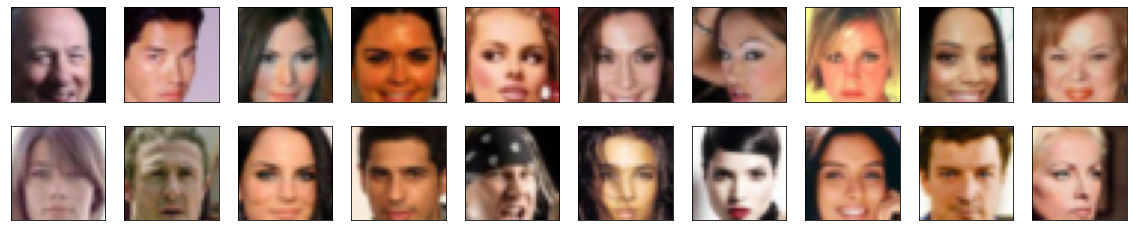

In [5]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [6]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    
    min, max = feature_range
    x = x * (max - min) + min
    
    return x

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.9843)
Max:  tensor(0.9137)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
# helper conv function
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels, out_channels, 
                           kernel_size, stride, padding, bias=False)
    
    # append conv layer
    layers.append(conv_layer)

    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
     
    # using Sequential container
    return nn.Sequential(*layers)

In [10]:
class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()

        self.conv_dim = conv_dim

        # 32x32 input and first layer without batch norm
        self.conv1 = conv(3, conv_dim, 4, batch_norm=False)
        # 16x16 out
        self.conv2 = conv(conv_dim, conv_dim*2, 4)
        # 8x8 out
        self.conv3 = conv(conv_dim*2, conv_dim*4, 4)
        # 4x4 out
        
        # final, fully-connected layer
        self.fc = nn.Linear(conv_dim*4*4*4, 1)

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        # define feedforward behavior
        out = F.leaky_relu(self.conv1(x), 0.2)
        out = F.leaky_relu(self.conv2(out), 0.2)
        out = F.leaky_relu(self.conv3(out), 0.2)
        
        # flatten
        out = out.view(-1, self.conv_dim*4*4*4)
        
        # final output layer
        x = self.fc(out)

        return x
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(Discriminator)

Tests Passed


## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [11]:
# helper deconv function
def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a transposed-convolutional layer, with optional batch normalization.
    """
    # create a sequence of transpose + optional batch norm layers
    layers = []
    transpose_conv_layer = nn.ConvTranspose2d(in_channels, out_channels, 
                                              kernel_size, stride, padding, bias=False)
    # append transpose convolutional layer
    layers.append(transpose_conv_layer)
    
    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
        
    return nn.Sequential(*layers)

In [12]:
class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()
        
        self.conv_dim = conv_dim
        
        # first, fully-connected layer
        self.fc = nn.Linear(z_size, conv_dim*4*4*4)

        # transpose conv layers
        self.t_conv1 = deconv(conv_dim*4, conv_dim*2, 4)
        self.t_conv2 = deconv(conv_dim*2, conv_dim, 4)
        self.t_conv3 = deconv(conv_dim, 3, 4, batch_norm=False)        

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # define feedforward behavior
        out = self.fc(x)
        out = out.view(-1, self.conv_dim*4, 4, 4)        
        # hidden transpose conv layers + relu
        out = F.relu(self.t_conv1(out))
        out = F.relu(self.t_conv2(out))        
        # last layer + tanh activation
        out = self.t_conv3(out)
        x = torch.tanh(out)
        
        return x

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(Generator)

Tests Passed


## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [13]:
def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    
    # TODO: Apply initial weights to convolutional and linear layers
    if hasattr(m, 'weight') and classname.find('Conv') or classname.find('Linear') != -1:
        m.weight.data.normal_(0.0, 0.02)
        m.bias.data.fill_(0)

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G

#### Exercise: Define model hyperparameters

In [15]:
# Define model hyperparams
d_conv_dim = 32
g_conv_dim = 32
z_size = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fc): Linear(in_features=2048, out_features=1, bias=True)
)

Generator(
  (fc): Linear(in_features=100, out_features=2048, bias=True)
  (t_conv1): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (t_conv2): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [17]:
def real_loss(D_out):
    '''Calculates how close discriminator outputs are to being real.
       param, D_out: discriminator logits
       return: real loss'''
    batch_size = D_out.size(0)
    
    # label smooth for real labels
    labels = torch.ones(batch_size) * 0.9
        
    if train_on_gpu:
        labels = labels.cuda()
        
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(), labels)
    
    return loss

def fake_loss(D_out):
    '''Calculates how close discriminator outputs are to being fake.
       param, D_out: discriminator logits
       return: fake loss'''
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size)
    
    if train_on_gpu:
        labels = labels.cuda()
        
    criterion = nn.BCEWithLogitsLoss()
    loss = criterion(D_out.squeeze(), labels)
    
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [18]:
import torch.optim as optim

# params
lr = 0.0002
beta1=0.5
beta2=0.999

# Create optimizers for the discriminator D and generator G
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2])
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2])

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [19]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images)

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            
            # 1. Train the discriminator on real and fake images
            
            d_optimizer.zero_grad()
            
            if train_on_gpu:
                real_images = real_images.cuda()
            
            D_real = D(real_images)
            d_real_loss = real_loss(D_real)
            
            # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            
            if train_on_gpu:
                z = z.cuda()
                
            fake_images = G(z)
            D_fake = D(fake_images)
            d_fake_loss = fake_loss(D_fake)
            
            d_loss = d_real_loss + d_fake_loss
            
            d_loss.backward()
            d_optimizer.step()

            # 2. Train the generator with an adversarial loss
            g_optimizer.zero_grad()
            
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            
            if train_on_gpu:
                z = z.cuda()
            
            fake_images = G(z)
            D_fake = D(fake_images)
            g_loss = real_loss(D_fake)
            
            g_loss.backward()
            g_optimizer.step()
            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [20]:
# set number of epochs 
n_epochs = 50

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G, n_epochs=n_epochs)

Epoch [    1/   50] | d_loss: 1.3872 | g_loss: 0.6948
Epoch [    1/   50] | d_loss: 0.9360 | g_loss: 1.0276
Epoch [    1/   50] | d_loss: 0.5754 | g_loss: 1.6951
Epoch [    1/   50] | d_loss: 0.7990 | g_loss: 2.1890
Epoch [    1/   50] | d_loss: 0.9734 | g_loss: 2.3174
Epoch [    1/   50] | d_loss: 0.8490 | g_loss: 1.3046
Epoch [    1/   50] | d_loss: 0.9389 | g_loss: 1.2826
Epoch [    1/   50] | d_loss: 1.0727 | g_loss: 1.6163
Epoch [    1/   50] | d_loss: 0.9687 | g_loss: 1.2351
Epoch [    1/   50] | d_loss: 1.0342 | g_loss: 1.9193
Epoch [    1/   50] | d_loss: 1.0851 | g_loss: 1.0986
Epoch [    1/   50] | d_loss: 1.0574 | g_loss: 1.2337
Epoch [    1/   50] | d_loss: 1.1717 | g_loss: 1.6321
Epoch [    1/   50] | d_loss: 1.0977 | g_loss: 1.3780
Epoch [    1/   50] | d_loss: 1.1478 | g_loss: 1.1419
Epoch [    1/   50] | d_loss: 1.1388 | g_loss: 1.0095
Epoch [    1/   50] | d_loss: 1.1511 | g_loss: 1.5267
Epoch [    1/   50] | d_loss: 1.1079 | g_loss: 1.0567
Epoch [    1/   50] | d_loss

Epoch [    6/   50] | d_loss: 1.0372 | g_loss: 1.2290
Epoch [    6/   50] | d_loss: 1.1789 | g_loss: 0.9172
Epoch [    6/   50] | d_loss: 1.1924 | g_loss: 1.0363
Epoch [    6/   50] | d_loss: 1.0921 | g_loss: 1.0129
Epoch [    6/   50] | d_loss: 0.9406 | g_loss: 1.0941
Epoch [    6/   50] | d_loss: 1.1218 | g_loss: 1.0484
Epoch [    6/   50] | d_loss: 1.0344 | g_loss: 1.3327
Epoch [    6/   50] | d_loss: 0.9681 | g_loss: 1.3165
Epoch [    6/   50] | d_loss: 0.9641 | g_loss: 0.9851
Epoch [    6/   50] | d_loss: 0.9810 | g_loss: 1.1397
Epoch [    6/   50] | d_loss: 1.0724 | g_loss: 0.9283
Epoch [    6/   50] | d_loss: 1.0523 | g_loss: 0.8729
Epoch [    6/   50] | d_loss: 1.0435 | g_loss: 1.1301
Epoch [    6/   50] | d_loss: 1.0870 | g_loss: 1.3533
Epoch [    6/   50] | d_loss: 1.0215 | g_loss: 1.1510
Epoch [    6/   50] | d_loss: 0.9453 | g_loss: 1.1704
Epoch [    6/   50] | d_loss: 1.0230 | g_loss: 1.5853
Epoch [    6/   50] | d_loss: 0.9825 | g_loss: 1.3849
Epoch [    6/   50] | d_loss

Epoch [   11/   50] | d_loss: 0.7033 | g_loss: 1.5286
Epoch [   11/   50] | d_loss: 1.1255 | g_loss: 1.2668
Epoch [   11/   50] | d_loss: 0.7739 | g_loss: 1.6298
Epoch [   11/   50] | d_loss: 0.8477 | g_loss: 1.1393
Epoch [   11/   50] | d_loss: 0.9678 | g_loss: 2.2560
Epoch [   11/   50] | d_loss: 0.8637 | g_loss: 1.1921
Epoch [   11/   50] | d_loss: 0.7520 | g_loss: 1.7534
Epoch [   11/   50] | d_loss: 0.7717 | g_loss: 0.9064
Epoch [   11/   50] | d_loss: 0.7136 | g_loss: 1.6152
Epoch [   11/   50] | d_loss: 0.9533 | g_loss: 1.9346
Epoch [   11/   50] | d_loss: 0.7021 | g_loss: 1.2595
Epoch [   11/   50] | d_loss: 1.0832 | g_loss: 1.1473
Epoch [   11/   50] | d_loss: 0.9261 | g_loss: 1.8449
Epoch [   11/   50] | d_loss: 0.9183 | g_loss: 2.0269
Epoch [   11/   50] | d_loss: 1.1738 | g_loss: 1.8413
Epoch [   12/   50] | d_loss: 1.0081 | g_loss: 2.0218
Epoch [   12/   50] | d_loss: 0.7706 | g_loss: 1.1092
Epoch [   12/   50] | d_loss: 0.7432 | g_loss: 1.7832
Epoch [   12/   50] | d_loss

Epoch [   16/   50] | d_loss: 0.5889 | g_loss: 1.4527
Epoch [   16/   50] | d_loss: 1.4608 | g_loss: 4.8979
Epoch [   16/   50] | d_loss: 0.6568 | g_loss: 1.6630
Epoch [   16/   50] | d_loss: 0.7095 | g_loss: 2.4582
Epoch [   16/   50] | d_loss: 0.5777 | g_loss: 2.0877
Epoch [   16/   50] | d_loss: 0.8894 | g_loss: 3.4467
Epoch [   16/   50] | d_loss: 0.5922 | g_loss: 1.8727
Epoch [   16/   50] | d_loss: 0.6074 | g_loss: 1.6608
Epoch [   17/   50] | d_loss: 0.5884 | g_loss: 1.5748
Epoch [   17/   50] | d_loss: 0.5542 | g_loss: 2.7023
Epoch [   17/   50] | d_loss: 0.5295 | g_loss: 2.5150
Epoch [   17/   50] | d_loss: 0.8790 | g_loss: 1.2489
Epoch [   17/   50] | d_loss: 0.6971 | g_loss: 2.9206
Epoch [   17/   50] | d_loss: 0.6618 | g_loss: 2.0958
Epoch [   17/   50] | d_loss: 0.7947 | g_loss: 1.3352
Epoch [   17/   50] | d_loss: 0.7206 | g_loss: 2.7141
Epoch [   17/   50] | d_loss: 0.7829 | g_loss: 2.5790
Epoch [   17/   50] | d_loss: 0.6524 | g_loss: 1.4739
Epoch [   17/   50] | d_loss

Epoch [   21/   50] | d_loss: 0.5676 | g_loss: 1.3372
Epoch [   22/   50] | d_loss: 2.9757 | g_loss: 6.2813
Epoch [   22/   50] | d_loss: 0.5903 | g_loss: 2.0827
Epoch [   22/   50] | d_loss: 0.5639 | g_loss: 3.0998
Epoch [   22/   50] | d_loss: 0.5841 | g_loss: 2.5043
Epoch [   22/   50] | d_loss: 0.5133 | g_loss: 3.0153
Epoch [   22/   50] | d_loss: 0.7029 | g_loss: 2.7660
Epoch [   22/   50] | d_loss: 0.5538 | g_loss: 1.5148
Epoch [   22/   50] | d_loss: 0.5935 | g_loss: 2.2584
Epoch [   22/   50] | d_loss: 0.6757 | g_loss: 2.4310
Epoch [   22/   50] | d_loss: 0.5335 | g_loss: 2.3691
Epoch [   22/   50] | d_loss: 0.6192 | g_loss: 2.5582
Epoch [   22/   50] | d_loss: 0.4790 | g_loss: 2.9859
Epoch [   22/   50] | d_loss: 0.6847 | g_loss: 3.0861
Epoch [   22/   50] | d_loss: 0.4416 | g_loss: 3.0594
Epoch [   22/   50] | d_loss: 0.5350 | g_loss: 2.4686
Epoch [   22/   50] | d_loss: 0.5898 | g_loss: 2.5634
Epoch [   22/   50] | d_loss: 0.7886 | g_loss: 1.2402
Epoch [   22/   50] | d_loss

Epoch [   27/   50] | d_loss: 0.5812 | g_loss: 2.3124
Epoch [   27/   50] | d_loss: 0.5636 | g_loss: 2.9986
Epoch [   27/   50] | d_loss: 0.5286 | g_loss: 2.2399
Epoch [   27/   50] | d_loss: 0.5050 | g_loss: 2.9830
Epoch [   27/   50] | d_loss: 0.4895 | g_loss: 2.9159
Epoch [   27/   50] | d_loss: 0.5649 | g_loss: 2.3333
Epoch [   27/   50] | d_loss: 0.5121 | g_loss: 3.5385
Epoch [   27/   50] | d_loss: 1.4063 | g_loss: 1.4824
Epoch [   27/   50] | d_loss: 0.5341 | g_loss: 2.5889
Epoch [   27/   50] | d_loss: 0.4703 | g_loss: 1.9549
Epoch [   27/   50] | d_loss: 0.5059 | g_loss: 2.9051
Epoch [   27/   50] | d_loss: 0.4598 | g_loss: 4.3132
Epoch [   27/   50] | d_loss: 0.4364 | g_loss: 3.0561
Epoch [   27/   50] | d_loss: 0.5170 | g_loss: 3.2217
Epoch [   27/   50] | d_loss: 0.5007 | g_loss: 2.0343
Epoch [   27/   50] | d_loss: 0.5398 | g_loss: 2.2402
Epoch [   27/   50] | d_loss: 0.5375 | g_loss: 1.6936
Epoch [   27/   50] | d_loss: 0.5765 | g_loss: 1.7983
Epoch [   27/   50] | d_loss

Epoch [   32/   50] | d_loss: 0.4245 | g_loss: 2.6138
Epoch [   32/   50] | d_loss: 0.6977 | g_loss: 2.5914
Epoch [   32/   50] | d_loss: 0.6047 | g_loss: 1.9236
Epoch [   32/   50] | d_loss: 0.4965 | g_loss: 3.6004
Epoch [   32/   50] | d_loss: 0.6173 | g_loss: 2.1292
Epoch [   32/   50] | d_loss: 0.5384 | g_loss: 2.6272
Epoch [   32/   50] | d_loss: 0.5539 | g_loss: 2.4675
Epoch [   32/   50] | d_loss: 0.6335 | g_loss: 1.4265
Epoch [   32/   50] | d_loss: 0.4312 | g_loss: 2.9638
Epoch [   32/   50] | d_loss: 0.4349 | g_loss: 3.1553
Epoch [   32/   50] | d_loss: 0.4373 | g_loss: 2.6107
Epoch [   32/   50] | d_loss: 0.5603 | g_loss: 2.9244
Epoch [   32/   50] | d_loss: 0.4716 | g_loss: 2.7595
Epoch [   32/   50] | d_loss: 0.4240 | g_loss: 3.2227
Epoch [   32/   50] | d_loss: 0.4709 | g_loss: 3.3066
Epoch [   32/   50] | d_loss: 0.4984 | g_loss: 2.0821
Epoch [   33/   50] | d_loss: 0.5573 | g_loss: 1.6203
Epoch [   33/   50] | d_loss: 0.4858 | g_loss: 2.7567
Epoch [   33/   50] | d_loss

Epoch [   37/   50] | d_loss: 0.5841 | g_loss: 2.3141
Epoch [   37/   50] | d_loss: 0.4989 | g_loss: 3.5000
Epoch [   37/   50] | d_loss: 0.6454 | g_loss: 1.9603
Epoch [   37/   50] | d_loss: 0.5306 | g_loss: 3.4661
Epoch [   37/   50] | d_loss: 0.5216 | g_loss: 2.4171
Epoch [   37/   50] | d_loss: 0.4555 | g_loss: 2.8080
Epoch [   37/   50] | d_loss: 0.6167 | g_loss: 2.7890
Epoch [   37/   50] | d_loss: 0.4040 | g_loss: 4.0525
Epoch [   37/   50] | d_loss: 0.6825 | g_loss: 2.7869
Epoch [   38/   50] | d_loss: 0.6384 | g_loss: 2.5293
Epoch [   38/   50] | d_loss: 0.7990 | g_loss: 1.5341
Epoch [   38/   50] | d_loss: 0.5287 | g_loss: 2.8108
Epoch [   38/   50] | d_loss: 0.8078 | g_loss: 1.4823
Epoch [   38/   50] | d_loss: 0.4617 | g_loss: 2.6213
Epoch [   38/   50] | d_loss: 0.4611 | g_loss: 3.2723
Epoch [   38/   50] | d_loss: 0.6478 | g_loss: 2.1333
Epoch [   38/   50] | d_loss: 0.4647 | g_loss: 3.6768
Epoch [   38/   50] | d_loss: 0.4267 | g_loss: 3.6037
Epoch [   38/   50] | d_loss

Epoch [   42/   50] | d_loss: 0.4272 | g_loss: 2.9371
Epoch [   42/   50] | d_loss: 0.5828 | g_loss: 3.4606
Epoch [   43/   50] | d_loss: 0.6710 | g_loss: 2.8957
Epoch [   43/   50] | d_loss: 0.4717 | g_loss: 2.8731
Epoch [   43/   50] | d_loss: 0.5935 | g_loss: 3.0408
Epoch [   43/   50] | d_loss: 0.5282 | g_loss: 3.5865
Epoch [   43/   50] | d_loss: 0.5435 | g_loss: 2.6751
Epoch [   43/   50] | d_loss: 0.4207 | g_loss: 3.4147
Epoch [   43/   50] | d_loss: 0.4688 | g_loss: 3.6062
Epoch [   43/   50] | d_loss: 0.4769 | g_loss: 3.6332
Epoch [   43/   50] | d_loss: 0.3874 | g_loss: 3.9284
Epoch [   43/   50] | d_loss: 0.5106 | g_loss: 4.1656
Epoch [   43/   50] | d_loss: 0.6115 | g_loss: 2.8079
Epoch [   43/   50] | d_loss: 0.4630 | g_loss: 3.1581
Epoch [   43/   50] | d_loss: 0.5599 | g_loss: 2.3476
Epoch [   43/   50] | d_loss: 0.4710 | g_loss: 3.1462
Epoch [   43/   50] | d_loss: 0.4279 | g_loss: 3.8394
Epoch [   43/   50] | d_loss: 0.4663 | g_loss: 3.5973
Epoch [   43/   50] | d_loss

Epoch [   48/   50] | d_loss: 0.4234 | g_loss: 2.8512
Epoch [   48/   50] | d_loss: 0.5804 | g_loss: 3.1334
Epoch [   48/   50] | d_loss: 0.4847 | g_loss: 3.3709
Epoch [   48/   50] | d_loss: 0.4221 | g_loss: 3.5699
Epoch [   48/   50] | d_loss: 0.5397 | g_loss: 3.6127
Epoch [   48/   50] | d_loss: 0.4292 | g_loss: 2.9960
Epoch [   48/   50] | d_loss: 0.4683 | g_loss: 3.7156
Epoch [   48/   50] | d_loss: 0.4426 | g_loss: 3.2701
Epoch [   48/   50] | d_loss: 0.4400 | g_loss: 3.0420
Epoch [   48/   50] | d_loss: 0.4751 | g_loss: 2.1028
Epoch [   48/   50] | d_loss: 0.5929 | g_loss: 2.4644
Epoch [   48/   50] | d_loss: 0.5023 | g_loss: 3.6026
Epoch [   48/   50] | d_loss: 0.4397 | g_loss: 3.9781
Epoch [   48/   50] | d_loss: 0.5180 | g_loss: 2.6543
Epoch [   48/   50] | d_loss: 0.4773 | g_loss: 2.9230
Epoch [   48/   50] | d_loss: 0.3937 | g_loss: 3.1143
Epoch [   48/   50] | d_loss: 0.4727 | g_loss: 2.7742
Epoch [   48/   50] | d_loss: 0.4214 | g_loss: 3.8254
Epoch [   48/   50] | d_loss

/home/dloperab/anaconda3/envs/dl_udacity/lib/python3.6/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

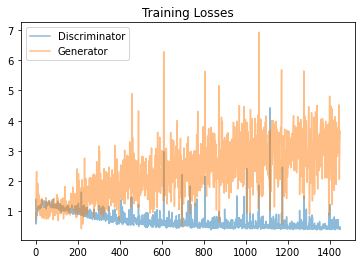

In [21]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [22]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [23]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

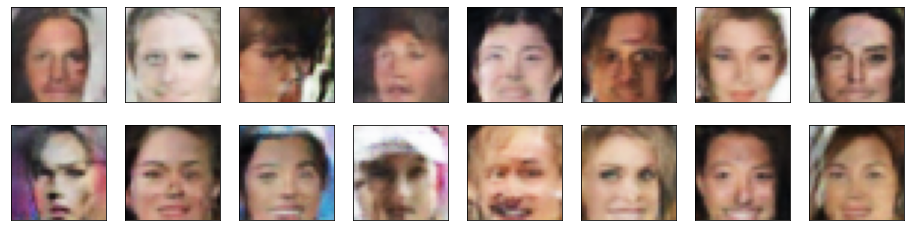

In [24]:
_ = view_samples(-1, samples)

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result


**Answer:** (Write your answer in this cell)

- I would like to add another datasets searching more variety of faces (gender, color, etc).
- I would like to try a deeper model for generator and discriminator to catch more characteristics of the faces.
- I would like to try different hyperparameters like learning rate and betas.
- At this moment, the model is generating low quality images, so I would like to train it for more epochs.

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "problem_unittests.py" files in your submission.